In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

In [3]:
def decode_rle_to_mask(rle, height, width):
    s = rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(height * width, dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(height, width)

In [4]:
class_names = [
    'finger-1', 'finger-2', 'finger-3', 'finger-4', 'finger-5',
    'finger-6', 'finger-7', 'finger-8', 'finger-9', 'finger-10',
    'finger-11', 'finger-12', 'finger-13', 'finger-14', 'finger-15',
    'finger-16', 'finger-17', 'finger-18', 'finger-19', 'Trapezium',
    'Trapezoid', 'Capitate', 'Hamate', 'Scaphoid', 'Lunate',
    'Triquetrum', 'Pisiform', 'Radius', 'Ulna',
]

PALETTE = [
    (220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230), (106, 0, 228),
    (0, 60, 100), (0, 80, 100), (0, 0, 70), (0, 0, 192), (250, 170, 30),
    (100, 170, 30), (220, 220, 0), (175, 116, 175), (250, 0, 30), (165, 42, 42),
    (255, 77, 255), (0, 226, 252), (182, 182, 255), (0, 82, 0), (120, 166, 157),
    (110, 76, 0), (174, 57, 255), (199, 100, 0), (72, 0, 118), (255, 179, 240),
    (0, 125, 92), (209, 0, 151), (188, 208, 182), (0, 220, 176),
]

def label2rgb(label):
    image_size = label.shape[1:] + (3, )
    image = np.zeros(image_size, dtype=np.uint8)
    for i, class_label in enumerate(label):
        image[class_label == 1] = PALETTE[i]
    return image

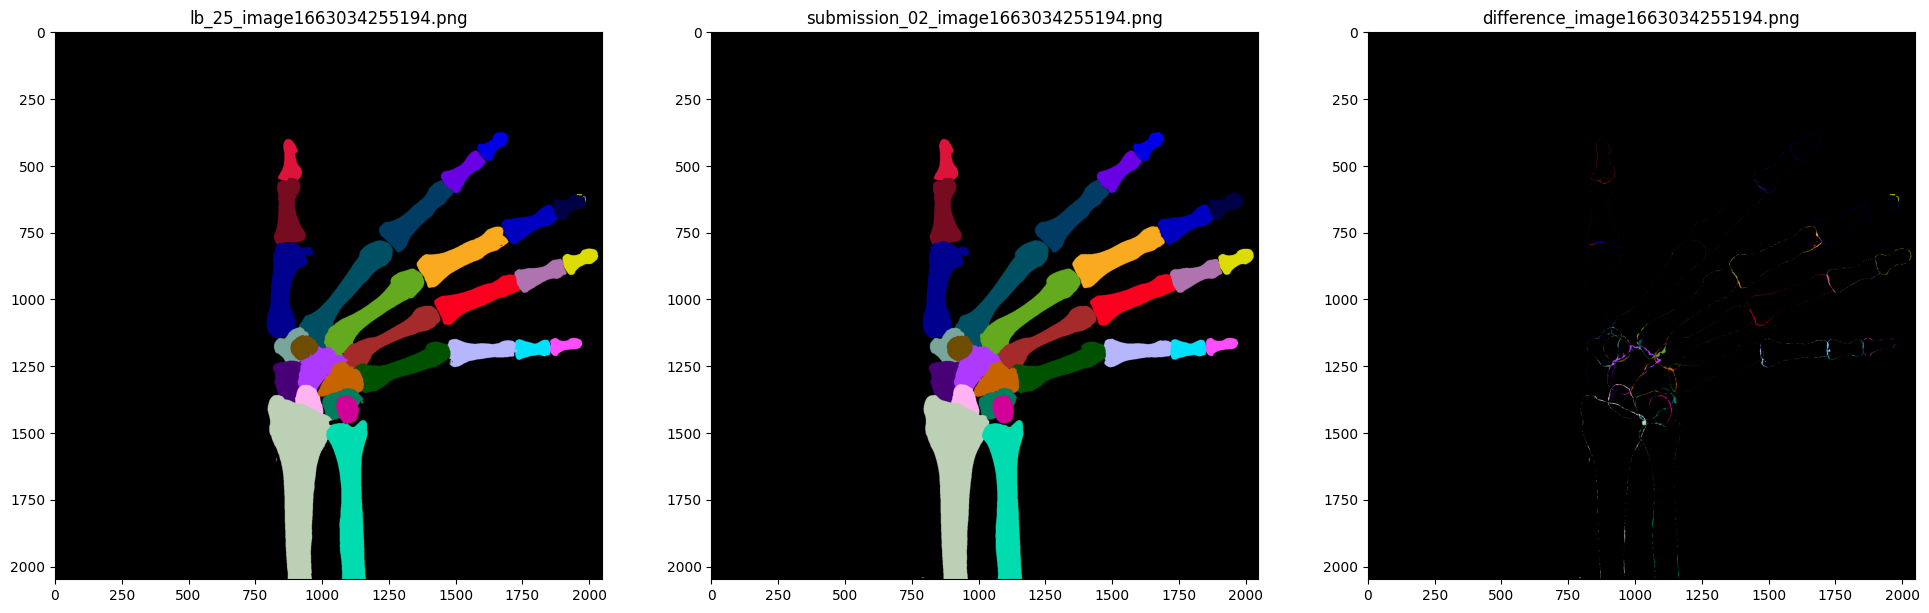

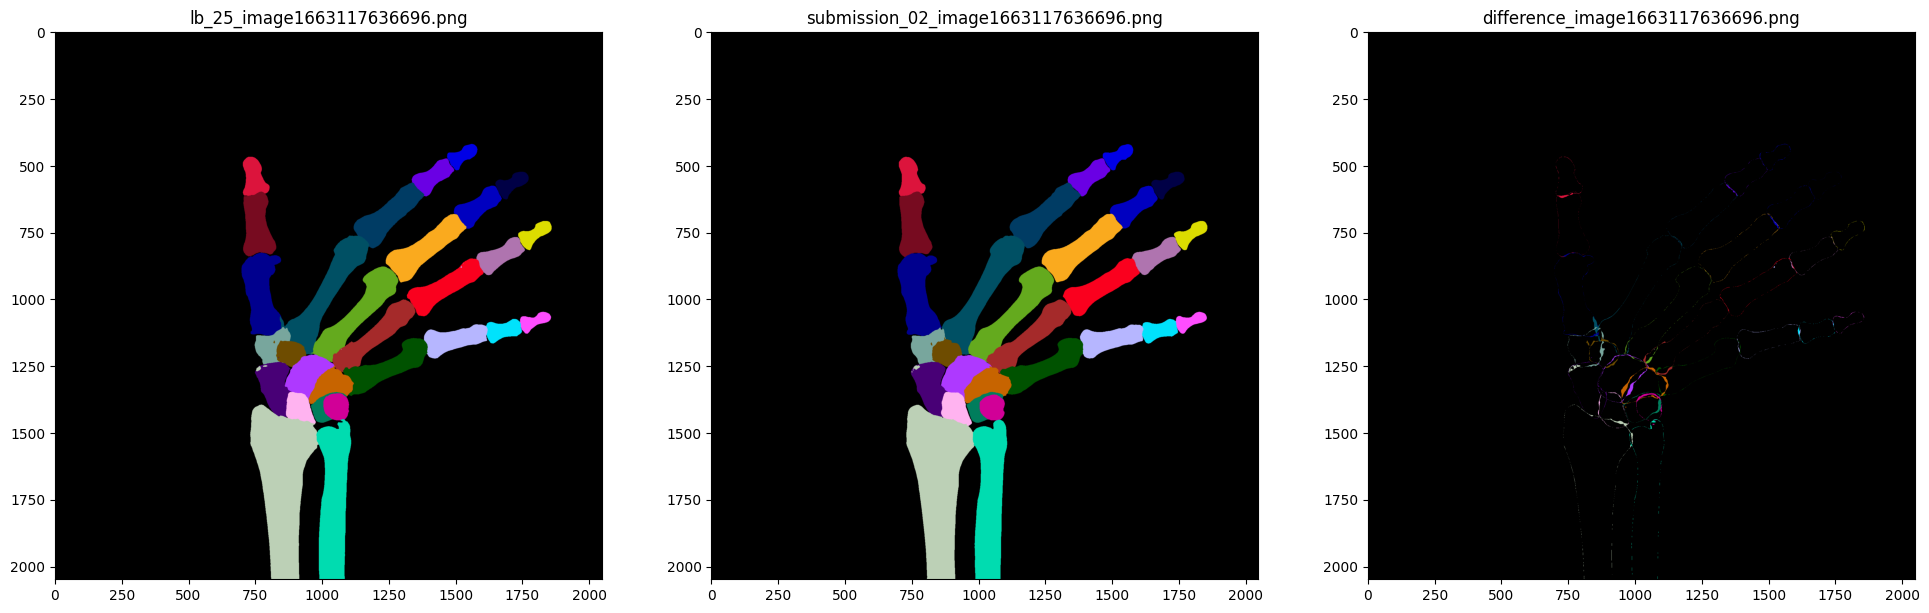

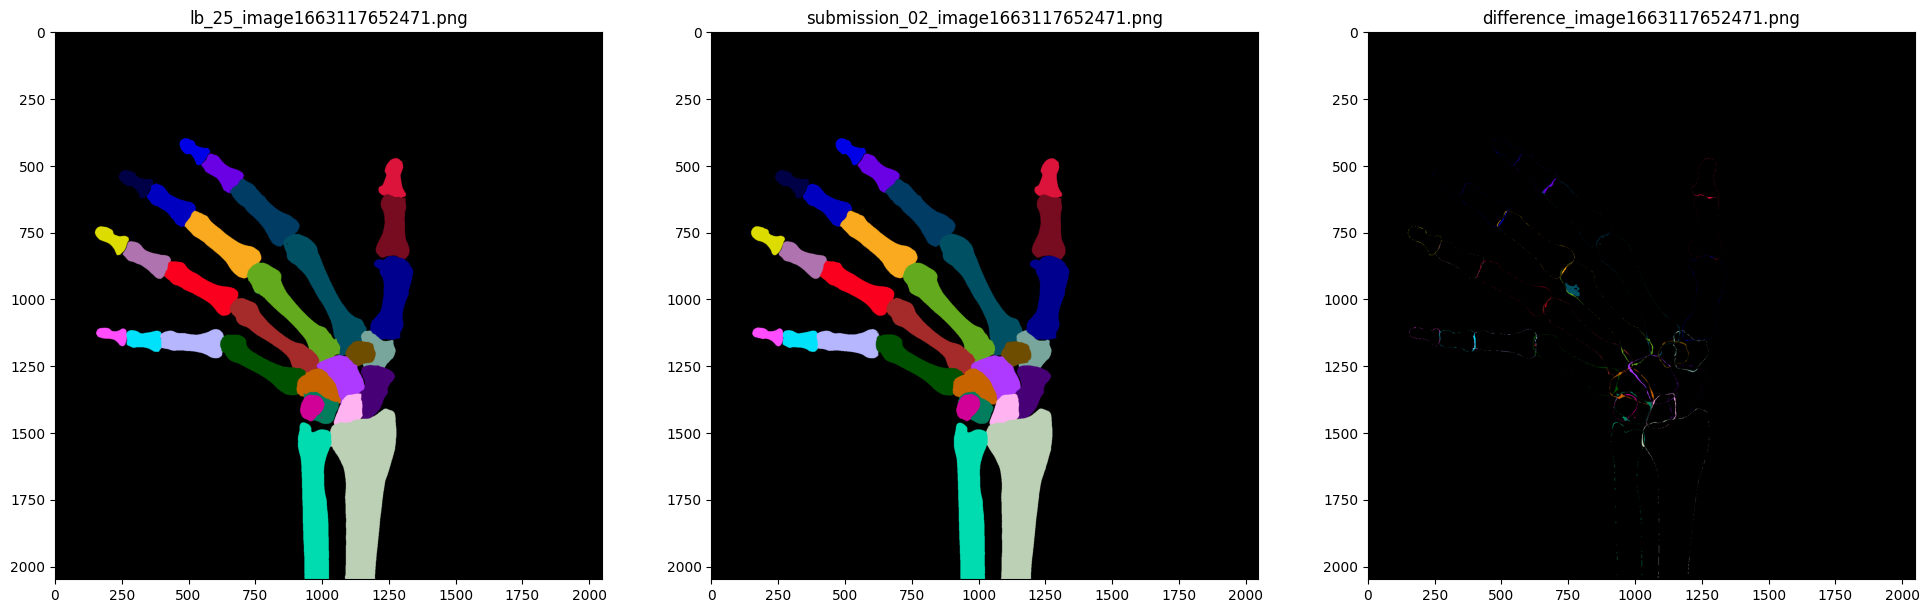

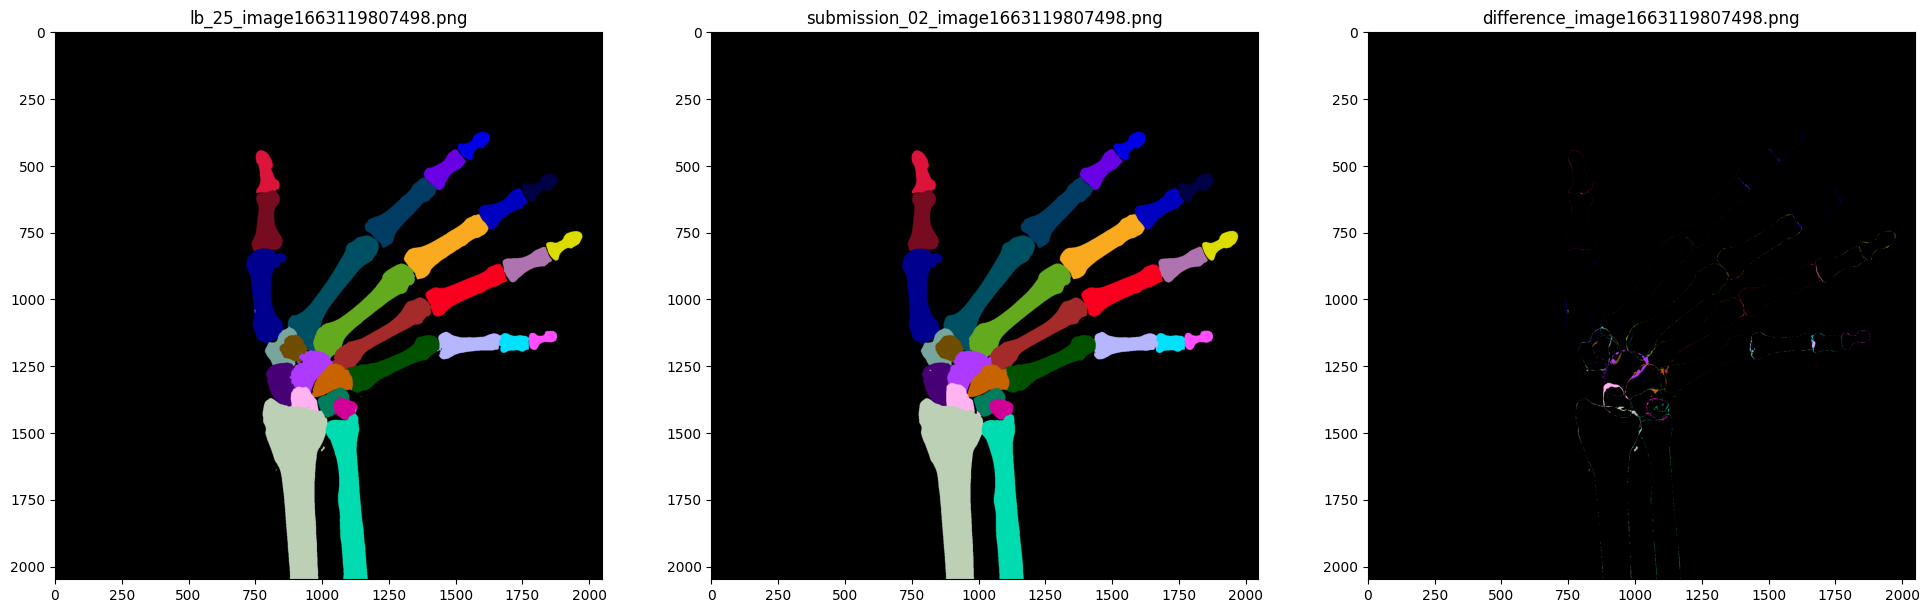

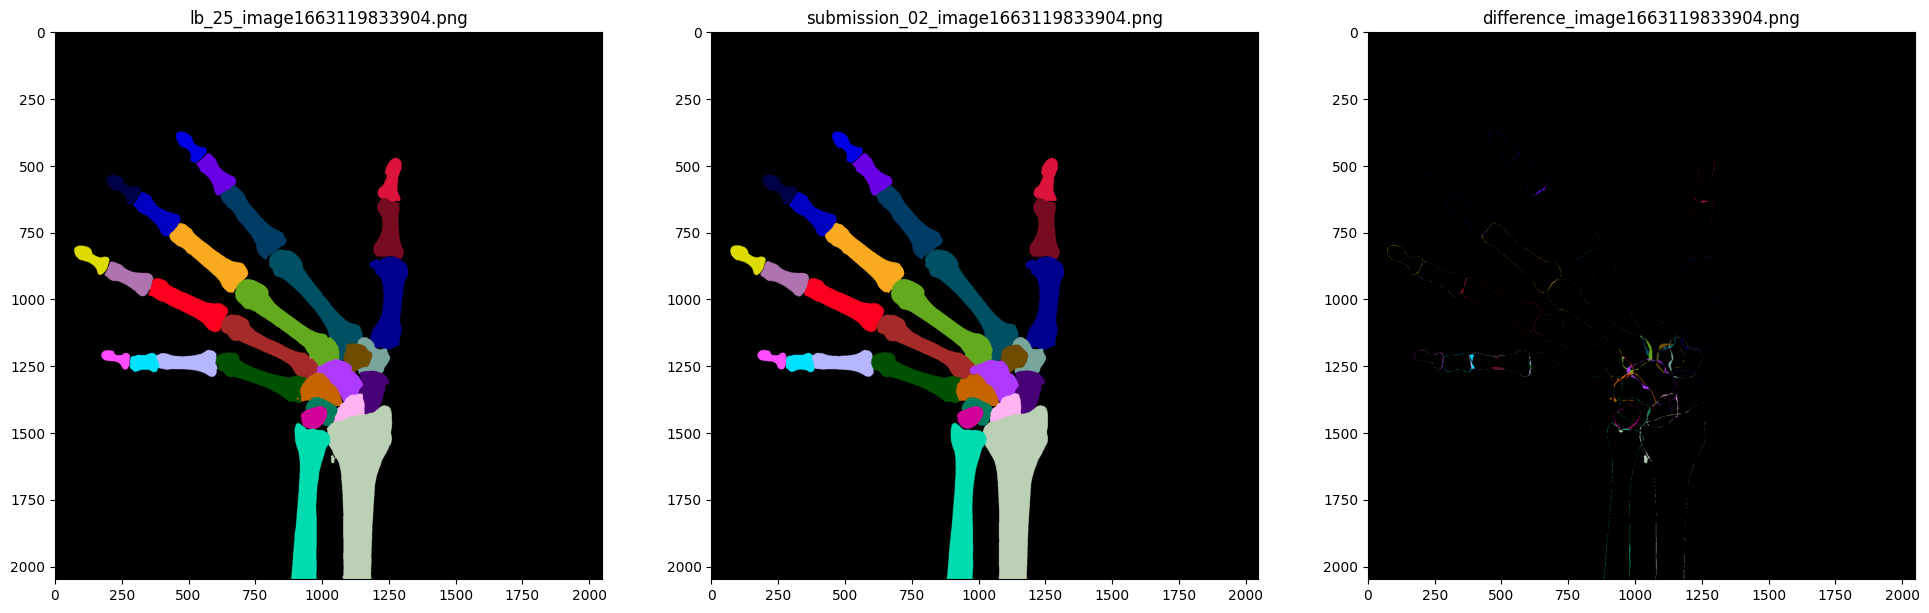

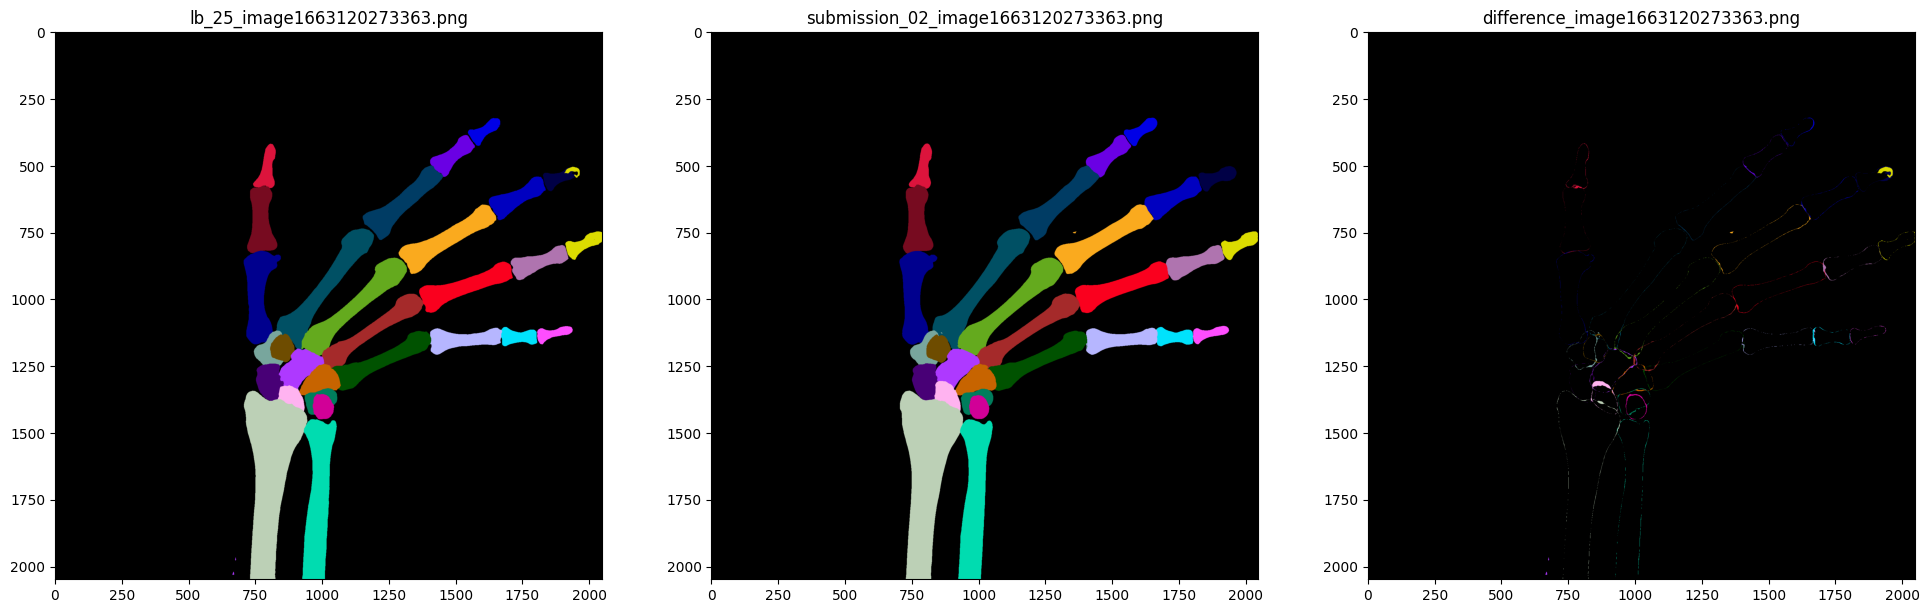

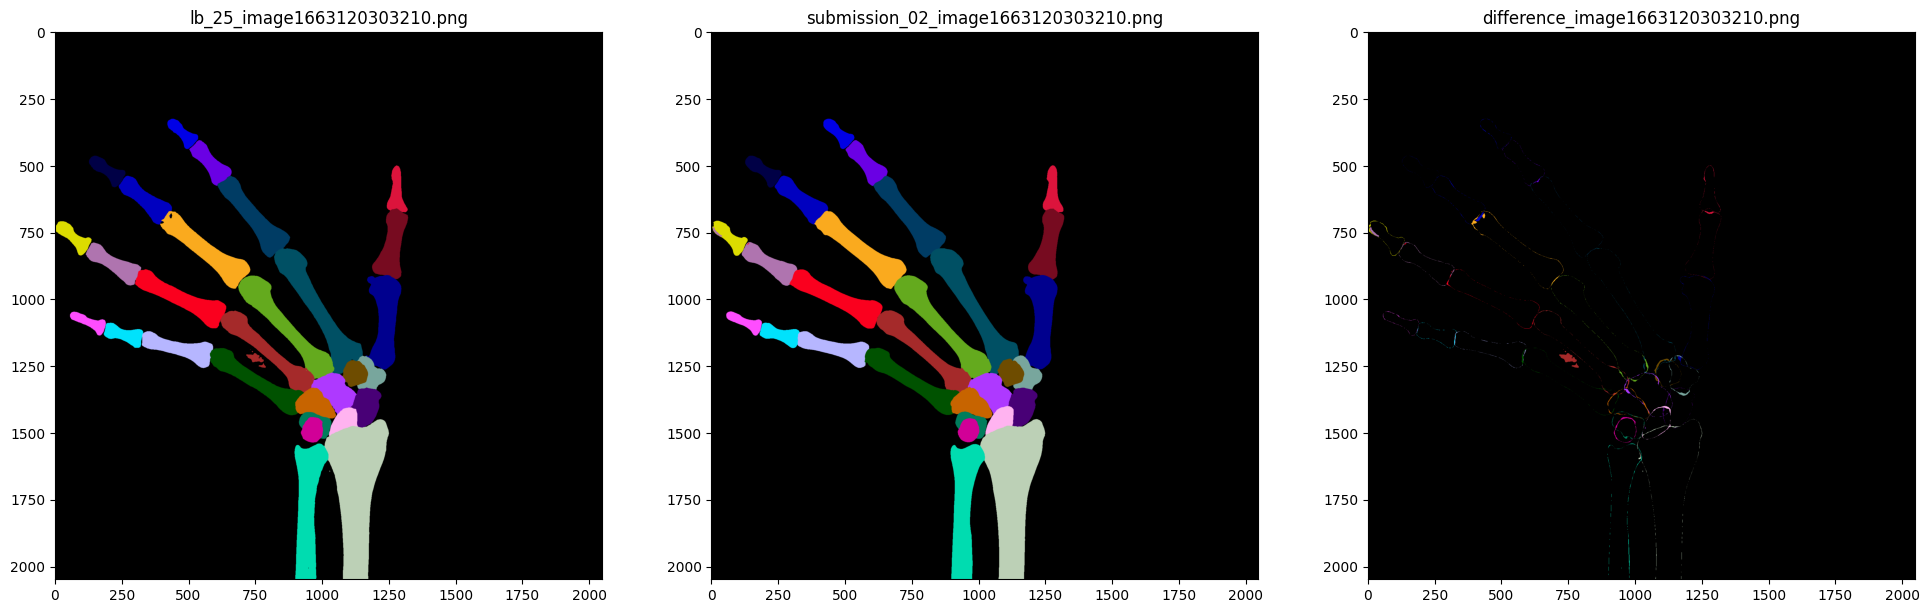

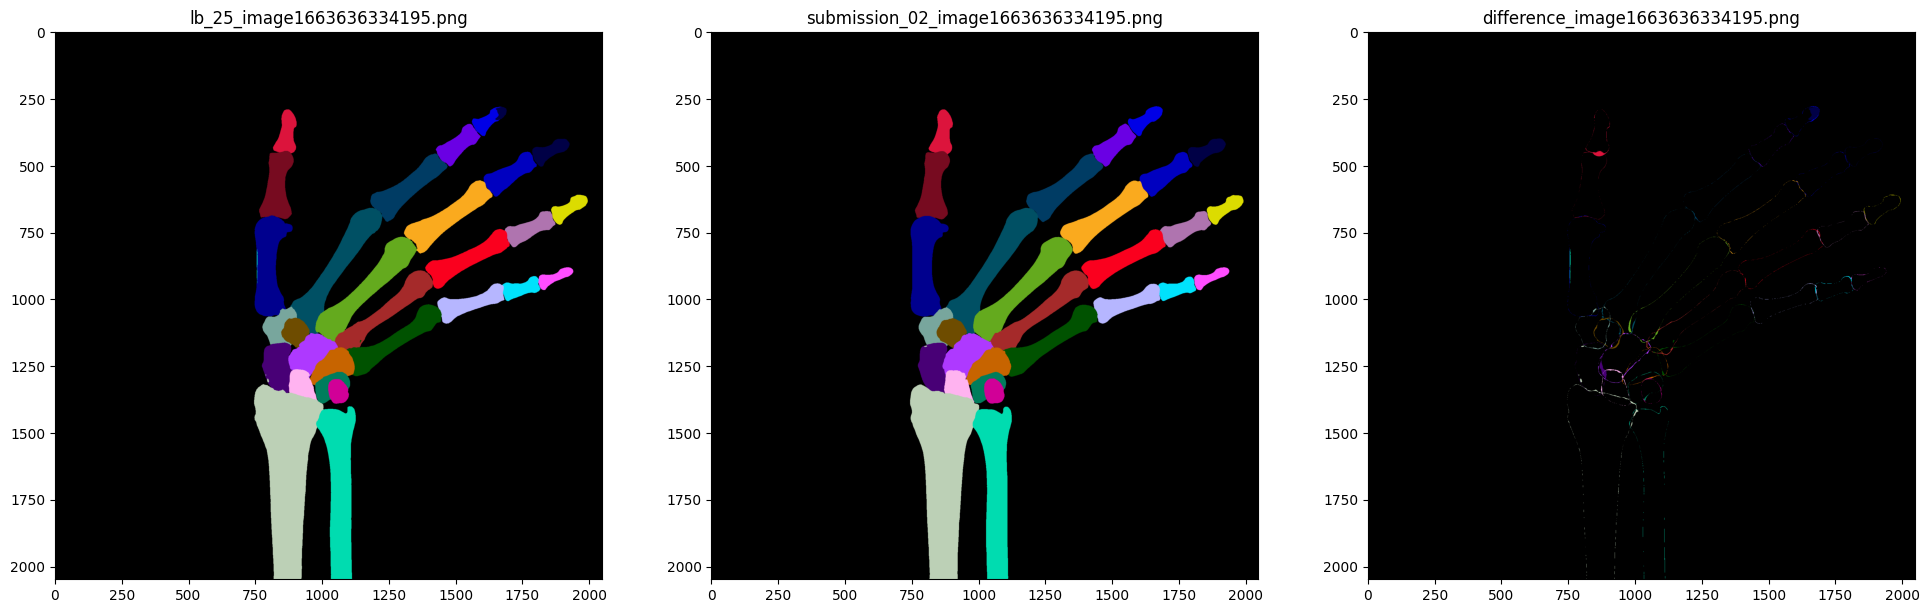

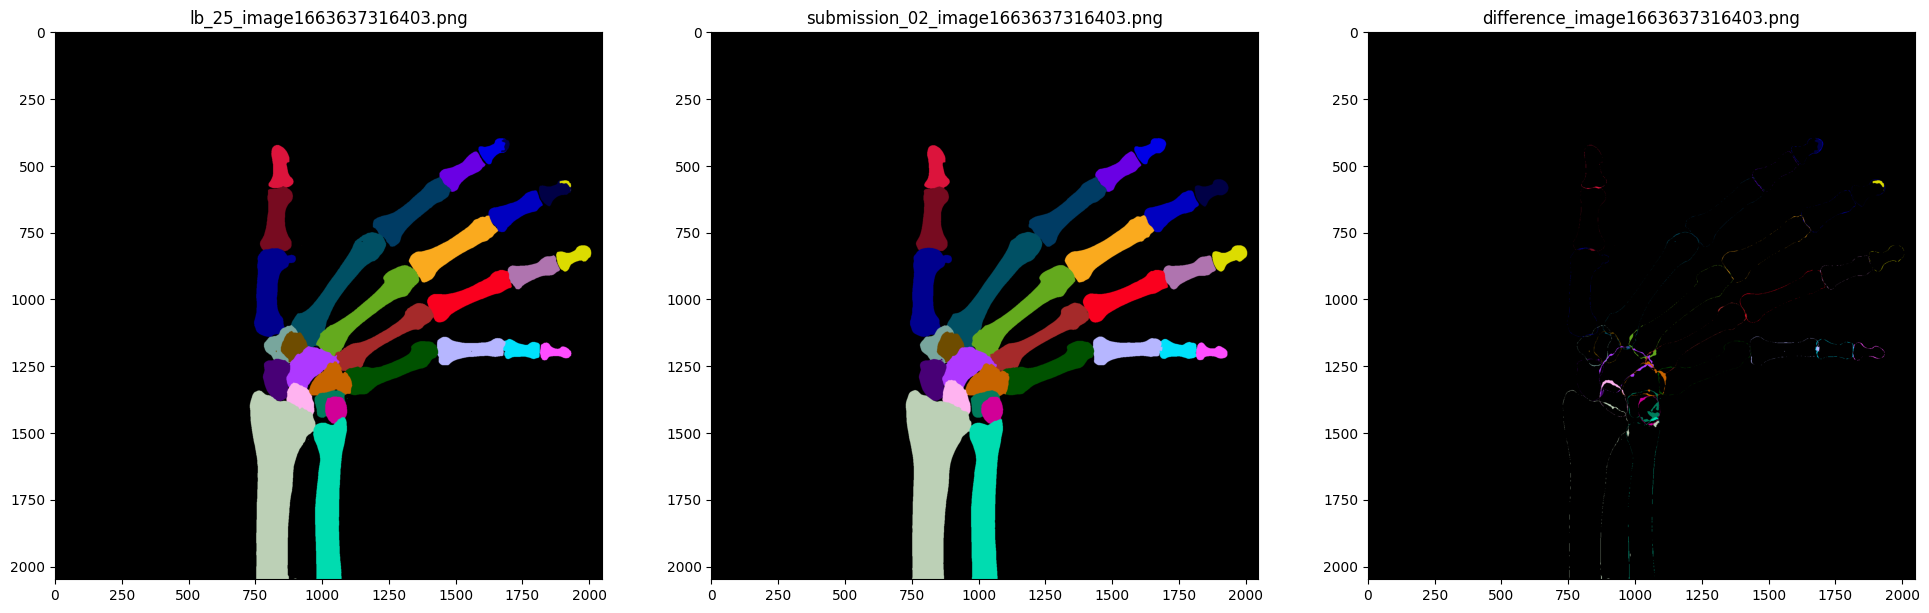

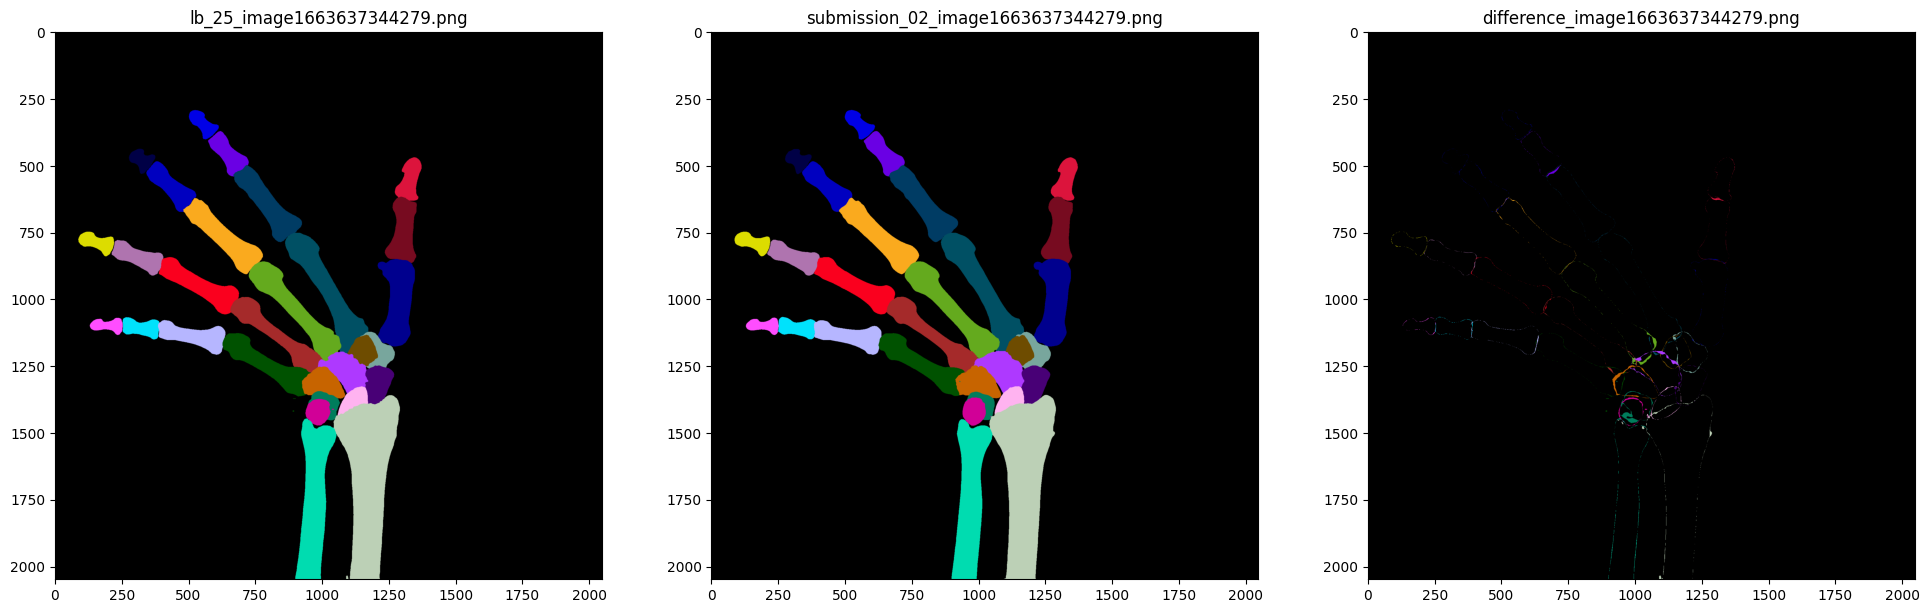

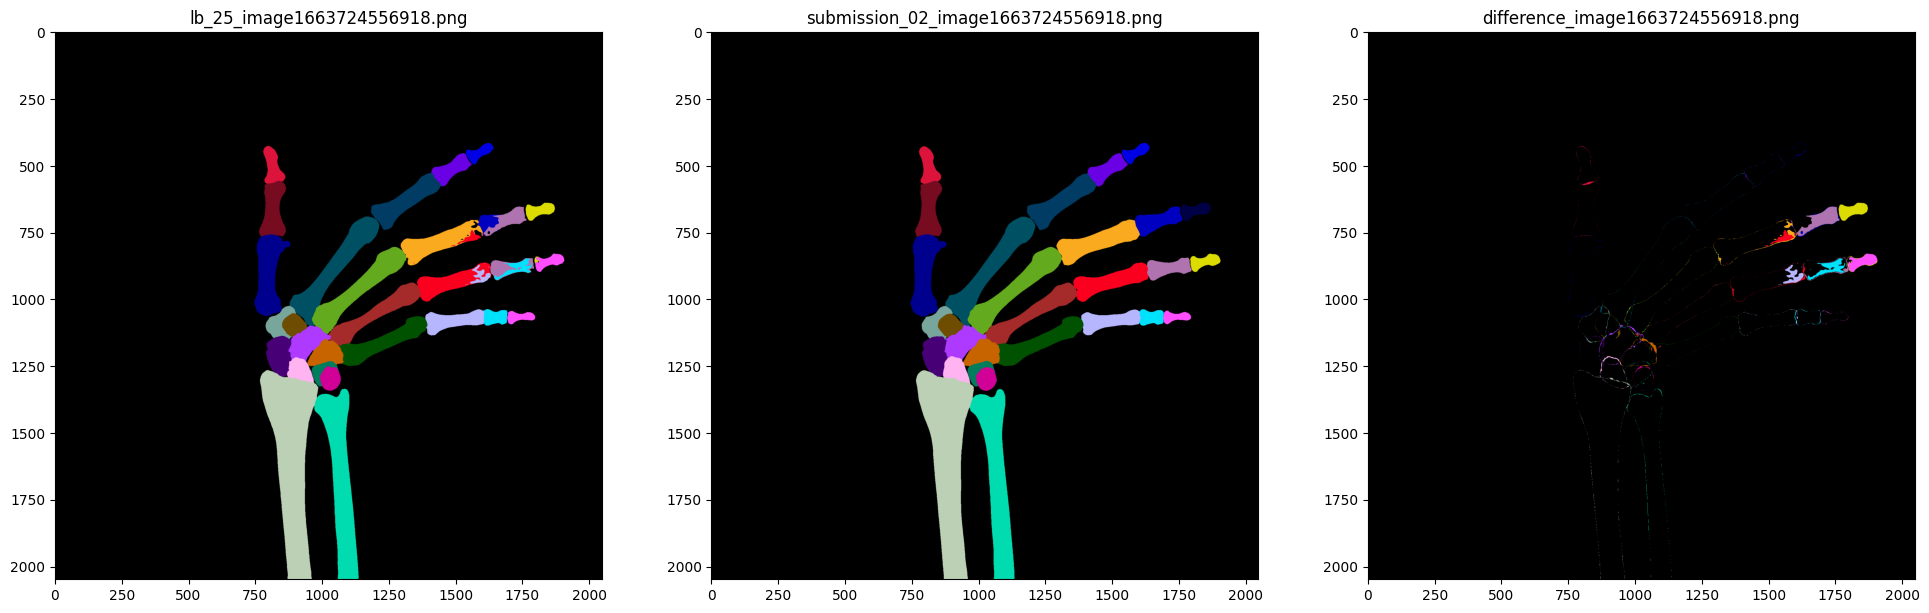

In [5]:

# dif_list = []
csv_path1 = "/data/ephemeral/home/level2-cv-semanticsegmentation-cv-03/ensemble/csv/lb_25.csv"
csv_path2 = "/data/ephemeral/home/level2-cv-semanticsegmentation-cv-03/ensemble/csv/submission_02.csv"
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
image_names = df1['image_name'].unique()
for image_name in image_names:
    mask1 = np.zeros((29, 2048, 2048), dtype=np.uint8)
    mask2 = np.zeros((29, 2048, 2048), dtype=np.uint8)
    for idx, class_name in enumerate(class_names):
        rle1 = df1[(df1['image_name'] == image_name) & (df1['class']== class_name)].iloc[0]['rle']
        rle2 = df2[(df2['image_name'] == image_name) & (df2['class']== class_name)].iloc[0]['rle']
        if pd.isna(rle1):
            mask1[idx] = np.zeros((2048, 2048), dtype=np.uint8)
        else:
            mask1[idx] = decode_rle_to_mask(rle1, 2048, 2048)
        
        if pd.isna(rle2):
            mask2[idx] = np.zeros((2048, 2048), dtype=np.uint8)
        else:
            mask2[idx] = decode_rle_to_mask(rle2, 2048, 2048)
    difference = (mask1+mask2)-(mask1*mask2)*2
    # dif_list.append(np.sum(difference))
    if np.sum(difference) < 16666.5: continue
    fig, ax = plt.subplots(1, 3, figsize=(24, 12))
    ax[0].set_title(f'{os.path.splitext(os.path.basename(csv_path1))[0]}_{image_name}')
    ax[1].set_title(f'{os.path.splitext(os.path.basename(csv_path2))[0]}_{image_name}')
    ax[2].set_title(f'difference_{image_name}')
    ax[0].imshow(label2rgb(mask1))
    ax[1].imshow(label2rgb(mask2))
    ax[2].imshow(label2rgb(difference))
    plt.show()
# print(np.max(dif_list), np.min(dif_list), np.mean(dif_list), np.percentile(dif_list, 75))
    